In [ ]:
import sys, os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/BT5151/'
    print(path_to_file)
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/BT5151/
/content/gdrive/My Drive/BT5151


In [ ]:
! pip install langchain_community langchain_huggingface faiss-cpu pypdf -q
! pip install rouge_score -q
! pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import torch
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer
import re
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, roc_curve
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import torch
import random
import os
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import optuna
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import copy
from torch.utils.data import DataLoader
from langchain_huggingface import HuggingFaceEmbeddings, HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from sklearn.metrics.pairwise import cosine_similarity
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ValueWarning)

# Dataset Preparation

In [ ]:
df = pd.read_csv("5-Minute Crafts.csv")
data = df.copy()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Filter out stop words
stop_words = set(ENGLISH_STOP_WORDS)
def remove_stopwords(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    return ' '.join([word for word in tokens if word not in stop_words])

df['clean_title'] = df['title'].apply(remove_stopwords)
titles = df['clean_title'].tolist()

# Embedding
st_model = SentenceTransformer('all-MiniLM-L6-v2', device=device)
embeddings = st_model.encode(titles, show_progress_bar=True, convert_to_tensor=True)
df['embedding'] = embeddings.cpu().numpy().tolist()

df.head()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/156 [00:00<?, ?it/s]

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment,clean_title,embedding
0,v=XHTofu5wbbM,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444,super lazy life hacks cool hacks make life easier,"[-0.0833914577960968, 0.04790632054209709, 0.0..."
1,v=HGxx0umIQvk,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905,yum easy smart food hacks tasty recipes family...,"[-0.059721533209085464, -0.02317025698721409, ..."
2,v=Tt4RMk3Ih04,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000,helpful life hacks house,"[-0.04125108942389488, 0.047763533890247345, 0..."
3,v=A2MTydM5e58,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333,useful hacks home simple tips work extremely,"[-0.019461067393422127, -0.008086568675935268,..."
4,v=_halJ4yrmGQ,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000,crafty mom amazing parenting hacks crafts,"[-0.09689797461032867, 0.017160600051283836, 0..."


In [ ]:
# 70% train
df_train, df_temp = train_test_split(df, test_size=0.30, random_state=42)
# 15% val, 15% test
df_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)

# EDA + Word Clouds Analysis

In [ ]:
# Select only numerical features
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Compute descriptive statistics
descriptive_stats = numeric_features.describe().T
descriptive_stats['missing_count'] = data[numeric_features.columns].isnull().sum()
descriptive_stats['missing_pct'] = (descriptive_stats['missing_count'] / len(data)) * 100

# Round for better readability
descriptive_stats = descriptive_stats.round(3)

# Print the descriptive statistics table
print(descriptive_stats)

                      count         mean          std       min        25%  \
active_since_days    4978.0      827.809      426.976     1.000     365.00   
duration_seconds     4978.0      932.422      727.393    11.000     696.00   
total_views          4978.0  4349619.179  9936943.888  4034.000  567935.25   
num_chars            4978.0       44.456       13.470    11.000      35.00   
num_words            4978.0        8.209        2.516     3.000       6.00   
num_punctuation      4978.0        0.496        0.901     0.000       0.00   
num_words_uppercase  4978.0        6.139        2.547     0.000       5.00   
num_words_lowercase  4978.0        0.287        1.355     0.000       0.00   
num_stopwords        4978.0        2.050        1.373     0.000       1.00   
avg_word_len         4978.0        5.464        0.663     3.667       5.00   
contain_digits       4978.0        0.914        0.281     0.000       1.00   
startswith_digits    4978.0        0.857        0.350     0.000 

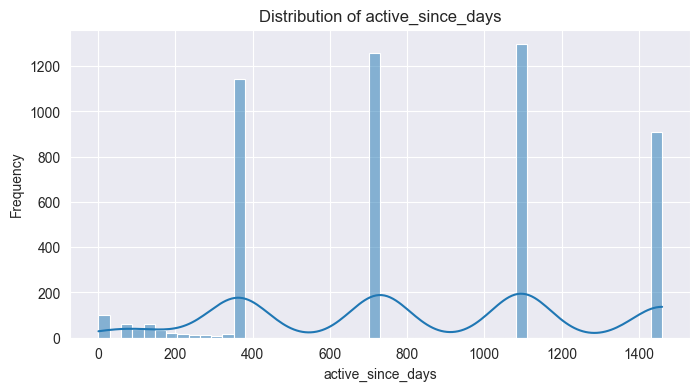

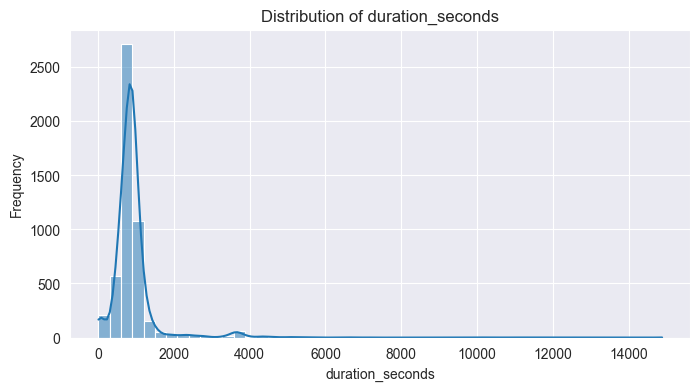

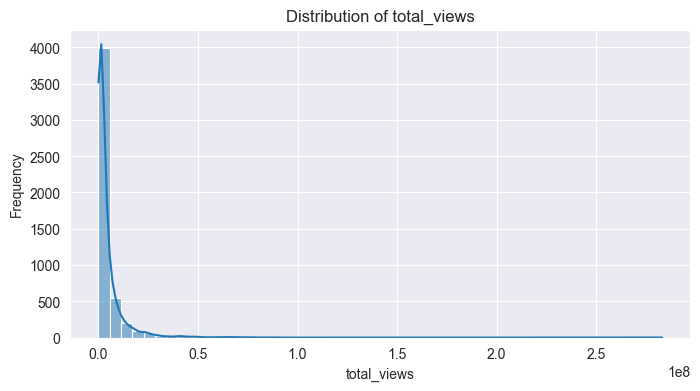

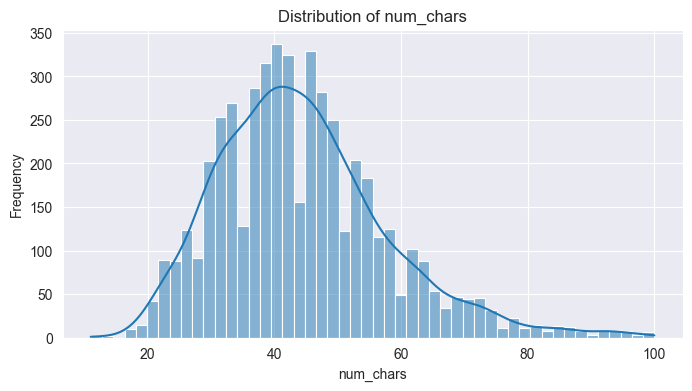

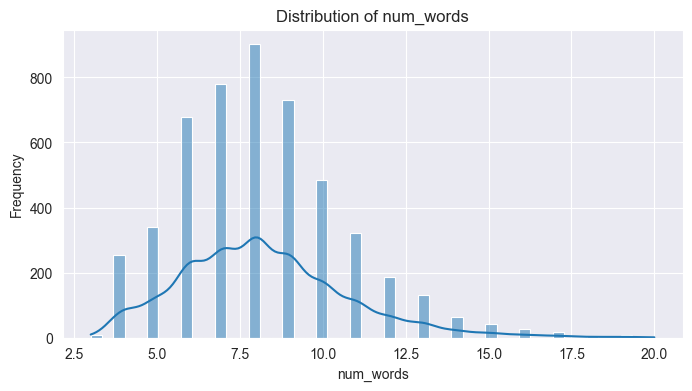

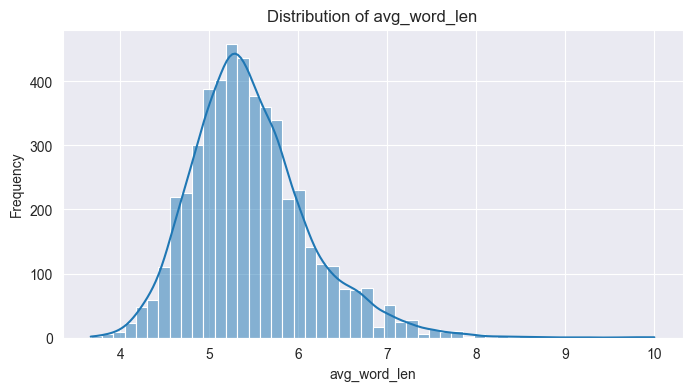

In [ ]:
num_features = ['active_since_days', 'duration_seconds', 'total_views',
                'num_chars', 'num_words', 'avg_word_len']

for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data[feature], kde=True, bins=50)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


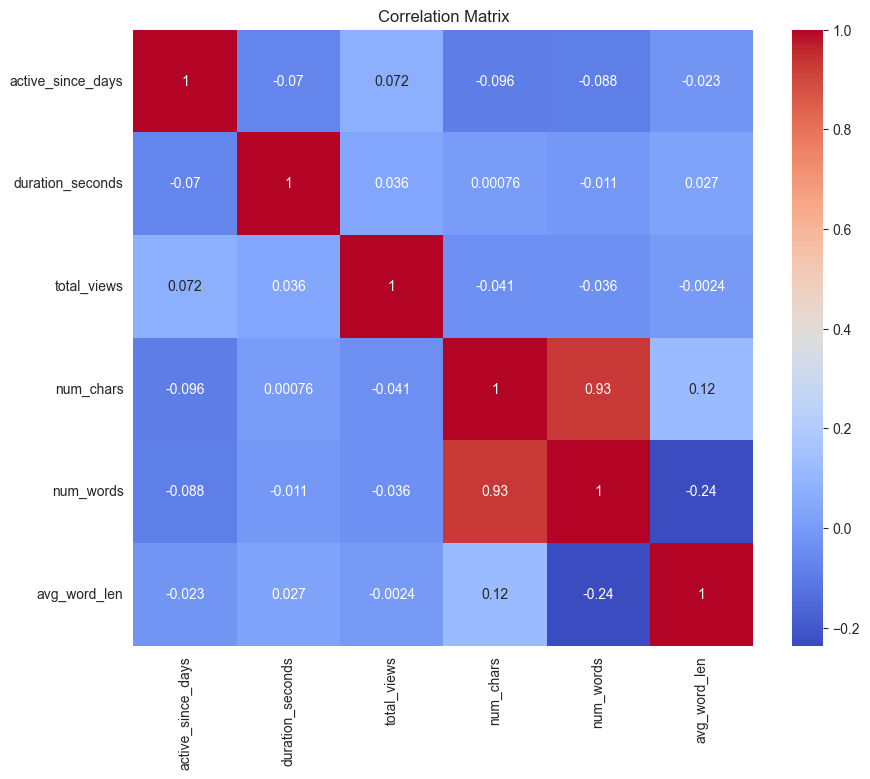

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


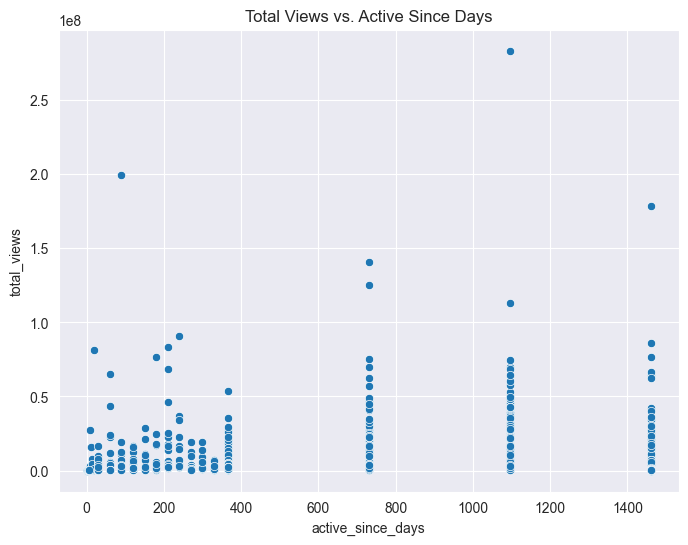

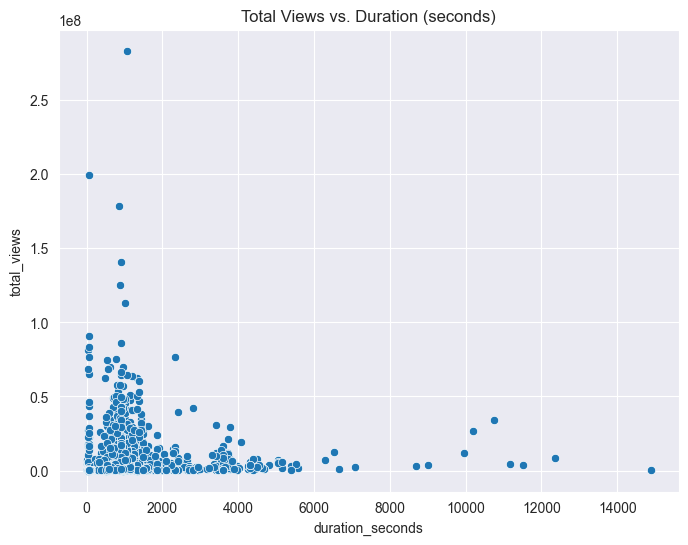

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='active_since_days', y='total_views', data=data)
plt.title('Total Views vs. Active Since Days')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='duration_seconds', y='total_views', data=data)
plt.title('Total Views vs. Duration (seconds)')
plt.show()


In [ ]:
# Word Clouds Analysis
all_tokens = " ".join(df['clean_title']).split()
word_counter = Counter(all_tokens)

top5_words = [word for word, freq in word_counter.most_common(5)]
print("Top 5 frequent words:", top5_words)

def plot_wordcloud(text, title, mask=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=ENGLISH_STOP_WORDS,
        max_words=300,
        max_font_size=200,
        random_state=42,
        mask=mask,
        width=800,
        height=600
    ).generate(text)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20, color='green')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

for word in top5_words:
    subset = df[df['clean_title'].str.contains(rf'\b{word}\b', regex=True)]
    combined_text = " ".join(subset['clean_title'])

    plot_wordcloud(
        combined_text,
        title=f"Keywords used along with \"{word}\""
    )


Output hidden; open in https://colab.research.google.com to view.

# Clustering Analysis

In [ ]:
X_embed = np.vstack(df['embedding'].values)

# Apply PCA to reduce dimension
pca = PCA(n_components=20, random_state=42)
X_embed_pca = pca.fit_transform(X_embed)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

PCA explained variance ratio: [0.09558898 0.04570245 0.04018247 0.03553052 0.02840651 0.02592451
 0.02474919 0.02313458 0.02110617 0.01807358 0.0168245  0.01572156
 0.01473812 0.01452823 0.01353991 0.01257195 0.01242539 0.01181738
 0.0114397  0.01070831]


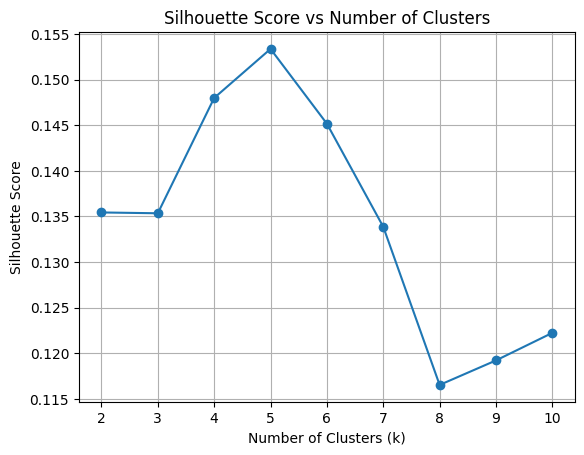

In [ ]:
# Select k
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_embed_pca)
    score = silhouette_score(X_embed_pca, labels)
    sil_scores.append(score)

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

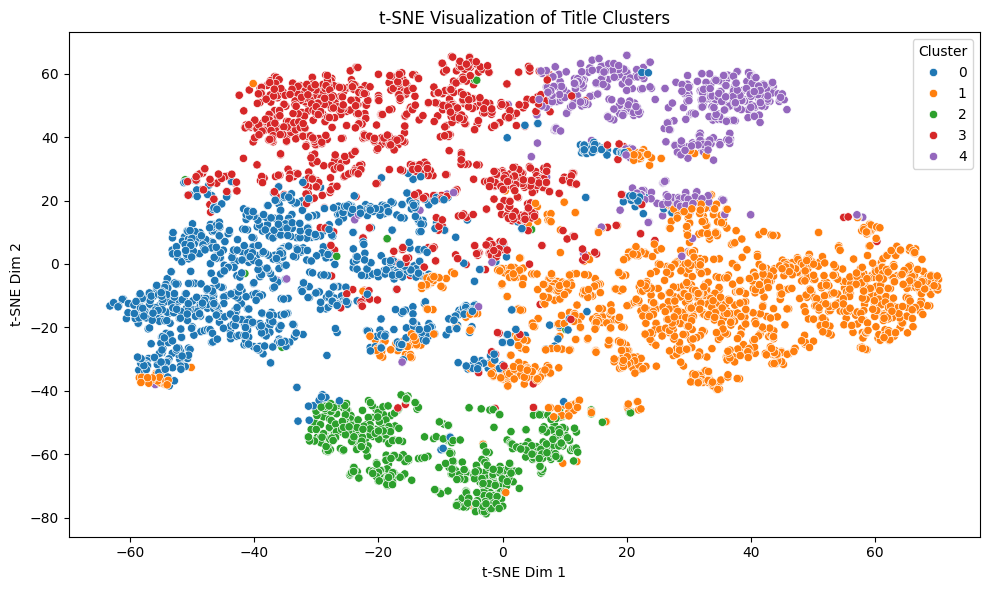

In [ ]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_embed_pca)

# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X_embed_pca)

df['tsne_x'] = X_2d[:, 0]
df['tsne_y'] = X_2d[:, 1]

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='cluster', palette='tab10')
plt.title("t-SNE Visualization of Title Clusters")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
# Print examples in each cluster
for c in range(best_k):
    print(f"\nCluster {c}:")
    sample_titles = df[df['cluster'] == c]['title'].head(30).tolist()
    for t in sample_titles:
        print("  -", t)


Cluster 0:
  - ARE YOU A CRAFTY MOM? Amazing Parenting Hacks And Crafts
  - KID'S ROOM MAKEOVER IDEAS || Awesome Home Decorating Hacks
  - SOAP BUBBLES CHALLENGE with 5-MINUTE CRAFTS #shorts
  - LOW-BUDGET ROOM MAKEOVER IDEAS || Smart Repair Hacks & Tricks
  - BEST GADGETS FOR SMART PARENTS
  - WOW! 5-MINUTE CRAFTS CITY GAME 🎮 #shorts
  - BEST ART HACKS & SCHOOL CRAFTS YOU NEED TO TRY
  - PIE FACE CHALLENGE WITH 5-MINUTE CRAFTS #shorts
  - AWESOME HACKS FOR PET OWNERS || Cute DIYs, Fun Toys and Useful Gadgets
  - PRICELESS HACKS & CRAFTS FOR PARENTS and THEIR KIDS
  - 5-MINUTE CRAFTS 5TH ANNIVERSARY CHALLENGE 🥳 #shorts
  - POSITIVE PARENTING TIPS || Best Crafts and Hacks For Smart Moms and Dads
  - Clever Recycling Hacks || How to Reuse Old Stuff
  - USEFUL HACKS & CRAFTS FOR THE BEST PARENTS EVER
  - SMART GADGETS & FUN TOYS THAT YOUR PETS WILL LOVE
  - SUMMER HOUSE vs WINTER HOUSE || Amazing Huge Craft Ideas
  - 5-MINUTE CRAFTS BOTTLE CHALLENGE #shorts
  - Fantastic Gadgets And Hack

Cluster 0: Creative home and parenting DIY hacks, featuring fun family activities, smart home tips, and pet-friendly ideas.

Cluster 1: Practical life hacks and household tips focusing on convenience, efficiency, and smart tricks for everyday problems.

Cluster 2: Entertaining food hacks, kitchen tricks, and fun snack ideas designed for speed, creativity, and family enjoyment.

Cluster 3: Interactive challenges, funny experiments, and parenting hacks focused on humor, kids' creativity, and family engagement.

Cluster 4: Trendy beauty, fashion, and self-care hacks emphasizing creative looks, makeover tips, and stylish upgrades.

# Sentiment Analysis

In [ ]:
# Extract the positive and negative lexicon from the three clusters
cluster_lexicon = {
    0: {
        'positive': {'creative', 'amazing', 'fun', 'smart', 'perfect', 'beautiful', 'family', 'cute', 'pet-friendly', 'helpful'},
        'negative': {'fail', 'mess', 'boring', 'useless', 'broken', 'waste', 'disaster', 'ugly', 'outdated', 'complicated'}
    },
    1: {
        'positive': {'easy', 'useful', 'practical', 'efficient', 'clever', 'smart', 'best', 'helpful', 'time-saving', 'quick'},
        'negative': {'problem', 'hard', 'mistake', 'annoying', 'struggle', 'difficult', 'fail', 'broken', 'outdated', 'mess'}
    },
    2: {
        'positive': {'fun', 'tasty', 'delicious', 'quick', 'amazing', 'creative', 'easy', 'best', 'epic', 'family-friendly'},
        'negative': {'fail', 'gross', 'weird', 'disaster', 'cringe', 'awkward', 'boring', 'messy', 'problem', 'unexpected'}
    },
    3: {
        'positive': {'funny', 'creative', 'smart', 'amazing', 'best', 'challenge', 'easy', 'family-friendly', 'cool', 'exciting'},
        'negative': {'fail', 'awkward', 'mess', 'boring', 'strange', 'unexpected', 'weird', 'mistake', 'problem', 'cringe'}
    },
    4: {
        'positive': {'beautiful', 'stylish', 'amazing', 'perfect', 'trendy', 'creative', 'cool', 'easy', 'fashionable', 'best'},
        'negative': {'fail', 'weird', 'awkward', 'mess', 'boring', 'broken', 'ugly', 'disaster', 'cringe', 'outdated'}
    }
}

# Calculate keyword_sentiment in each title
def keyword_sentiment_score(row):
    tokens = row['clean_title'].split()
    cluster_id = row['cluster']
    lex = cluster_lexicon.get(cluster_id, {'positive': set(), 'negative': set()})

    score = sum(1 for w in tokens if w in lex['positive']) - sum(1 for w in tokens if w in lex['negative'])
    return score

df['keyword_sentiment'] = df.apply(keyword_sentiment_score, axis=1)

df_train = df.loc[df_train.index]
df_val = df.loc[df_val.index]
df_test = df.loc[df_test.index]

In [ ]:
# Apply PCA to embeddings
pca = PCA(n_components=20, random_state=42)
df_train_embed_pca = pca.fit_transform(np.vstack(df_train['embedding']))
df_val_embed_pca = pca.transform(np.vstack(df_val['embedding']))
df_test_embed_pca = pca.transform(np.vstack(df_test['embedding']))

# Add meta features
meta_features = [
    'num_chars', 'num_words', 'num_punctuation',
    'num_words_uppercase', 'num_words_lowercase', 'num_stopwords',
    'avg_word_len', 'contain_digits', 'startswith_digits',
    'keyword_sentiment'
]

scaler = StandardScaler()
df_train_meta = scaler.fit_transform(df_train[meta_features])
df_val_meta = scaler.transform(df_val[meta_features])
df_test_meta = scaler.transform(df_test[meta_features])

# Construct dataset
def prepare_dataset(df, embed_pca, meta):
    X_embed = torch.tensor(embed_pca).float().to(device)
    X_kw = torch.tensor(df['keyword_sentiment'].values).float().unsqueeze(1).to(device)
    X_meta = torch.tensor(meta).float().to(device)
    y_tensor = torch.tensor(df['title_sentiment'].values).float().unsqueeze(1).to(device)
    X_total = torch.cat([X_embed, X_kw, X_meta], dim=1)
    return X_total, y_tensor

X_train_total, y_train_tensor = prepare_dataset(df_train, df_train_embed_pca, df_train_meta)
X_val_total, y_val_tensor = prepare_dataset(df_val, df_val_embed_pca, df_val_meta)
X_test_total, y_test_tensor = prepare_dataset(df_test, df_test_embed_pca, df_test_meta)

train_dataset = TensorDataset(X_train_total, y_train_tensor)
val_dataset = TensorDataset(X_val_total, y_val_tensor)

In [ ]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)

# LSTM
class SentimentLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(SentimentLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])
        return out

# Optuna
def objective(trial):
    hidden_dim = trial.suggest_categorical('hidden_dim', [64, 128, 256])
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])

    model = SentimentLSTM(input_dim=X_train_total.shape[1], hidden_dim=hidden_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    best_val_loss = np.inf
    early_stop_counter = 0
    patience = 3

    for epoch in range(10):
        model.train()
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            preds = model(x_batch)
            loss = criterion(preds, y_batch)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            val_preds = model(X_val_total)
            val_loss = criterion(val_preds, y_val_tensor).item()

        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    return best_val_loss

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=30)

print("Best Hyperparameters:", study.best_params)

# Retrain with best hyperparameters
best_params = study.best_params
model = SentimentLSTM(input_dim=X_train_total.shape[1], hidden_dim=best_params['hidden_dim']).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=best_params['lr'])
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)

best_model_wts = copy.deepcopy(model.state_dict())
best_val_loss = np.inf
early_stop_counter = 0
patience = 3

for epoch in range(10):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(x_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    model.eval()
    with torch.no_grad():
        val_preds = model(X_val_total)
        val_loss = criterion(val_preds, y_val_tensor).item()

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {total_loss:.4f}, Val MSE: {val_loss:.6f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

model.load_state_dict(best_model_wts)

[I 2025-04-16 04:43:18,586] A new study created in memory with name: no-name-f3243f3c-a8dd-418b-ab97-2d6cd6f44187
[I 2025-04-16 04:43:22,589] Trial 0 finished with value: 0.10535767674446106 and parameters: {'hidden_dim': 128, 'lr': 0.0015751320499779737, 'batch_size': 16}. Best is trial 0 with value: 0.10535767674446106.


Early stopping at epoch 8


[I 2025-04-16 04:43:27,201] Trial 1 finished with value: 0.11445236951112747 and parameters: {'hidden_dim': 64, 'lr': 0.00010994335574766199, 'batch_size': 16}. Best is trial 0 with value: 0.10535767674446106.
[I 2025-04-16 04:43:28,996] Trial 2 finished with value: 0.104393869638443 and parameters: {'hidden_dim': 256, 'lr': 0.0011207606211860567, 'batch_size': 64}. Best is trial 2 with value: 0.104393869638443.
[I 2025-04-16 04:43:32,313] Trial 3 finished with value: 0.10614798218011856 and parameters: {'hidden_dim': 256, 'lr': 0.000816845589476017, 'batch_size': 16}. Best is trial 2 with value: 0.104393869638443.


Early stopping at epoch 7


[I 2025-04-16 04:43:33,641] Trial 4 finished with value: 0.1098073422908783 and parameters: {'hidden_dim': 256, 'lr': 0.00021930485556643703, 'batch_size': 64}. Best is trial 2 with value: 0.104393869638443.
[I 2025-04-16 04:43:34,926] Trial 5 finished with value: 0.10451550036668777 and parameters: {'hidden_dim': 64, 'lr': 0.0023359635026261607, 'batch_size': 64}. Best is trial 2 with value: 0.104393869638443.
[I 2025-04-16 04:43:36,240] Trial 6 finished with value: 0.1042993813753128 and parameters: {'hidden_dim': 128, 'lr': 0.0021137059440645744, 'batch_size': 64}. Best is trial 6 with value: 0.1042993813753128.
[I 2025-04-16 04:43:37,165] Trial 7 finished with value: 0.10470619797706604 and parameters: {'hidden_dim': 128, 'lr': 0.007568292060167618, 'batch_size': 64}. Best is trial 6 with value: 0.1042993813753128.


Early stopping at epoch 7


[I 2025-04-16 04:43:38,464] Trial 8 finished with value: 0.10593223571777344 and parameters: {'hidden_dim': 128, 'lr': 0.0004473636174621269, 'batch_size': 64}. Best is trial 6 with value: 0.1042993813753128.
[I 2025-04-16 04:43:40,022] Trial 9 finished with value: 0.11171815544366837 and parameters: {'hidden_dim': 256, 'lr': 0.00019135880487692312, 'batch_size': 64}. Best is trial 6 with value: 0.1042993813753128.
[I 2025-04-16 04:43:42,456] Trial 10 finished with value: 0.10494617372751236 and parameters: {'hidden_dim': 128, 'lr': 0.004581420878774215, 'batch_size': 32}. Best is trial 6 with value: 0.1042993813753128.


Early stopping at epoch 8


[I 2025-04-16 04:43:44,593] Trial 11 finished with value: 0.10268879681825638 and parameters: {'hidden_dim': 256, 'lr': 0.0026936379642822942, 'batch_size': 32}. Best is trial 11 with value: 0.10268879681825638.


Early stopping at epoch 9


[I 2025-04-16 04:43:47,774] Trial 12 finished with value: 0.1011042445898056 and parameters: {'hidden_dim': 256, 'lr': 0.003571074803983617, 'batch_size': 32}. Best is trial 12 with value: 0.1011042445898056.
[I 2025-04-16 04:43:49,656] Trial 13 finished with value: 0.10263628512620926 and parameters: {'hidden_dim': 256, 'lr': 0.004223953814897999, 'batch_size': 32}. Best is trial 12 with value: 0.1011042445898056.


Early stopping at epoch 8


[I 2025-04-16 04:43:52,101] Trial 14 finished with value: 0.10005931556224823 and parameters: {'hidden_dim': 256, 'lr': 0.009546952120187273, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.
[I 2025-04-16 04:43:54,258] Trial 15 finished with value: 0.10278314352035522 and parameters: {'hidden_dim': 256, 'lr': 0.009776682065191025, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.


Early stopping at epoch 7


[I 2025-04-16 04:43:55,679] Trial 16 finished with value: 0.10923038423061371 and parameters: {'hidden_dim': 64, 'lr': 0.005177393746606983, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.


Early stopping at epoch 5


[I 2025-04-16 04:43:57,358] Trial 17 finished with value: 0.10208838433027267 and parameters: {'hidden_dim': 256, 'lr': 0.009869268316714034, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.


Early stopping at epoch 7


[I 2025-04-16 04:43:58,807] Trial 18 finished with value: 0.10589713603258133 and parameters: {'hidden_dim': 256, 'lr': 0.0036378163262826496, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.


Early stopping at epoch 6


[I 2025-04-16 04:44:01,182] Trial 19 finished with value: 0.10110248625278473 and parameters: {'hidden_dim': 256, 'lr': 0.007114004910131732, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.
[I 2025-04-16 04:44:03,524] Trial 20 finished with value: 0.10043915361166 and parameters: {'hidden_dim': 64, 'lr': 0.006985380177719457, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.
[I 2025-04-16 04:44:06,063] Trial 21 finished with value: 0.10086382180452347 and parameters: {'hidden_dim': 64, 'lr': 0.006732534117889717, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.


Early stopping at epoch 10


[I 2025-04-16 04:44:07,920] Trial 22 finished with value: 0.10610620677471161 and parameters: {'hidden_dim': 64, 'lr': 0.006203257221852193, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.


Early stopping at epoch 6


[I 2025-04-16 04:44:10,307] Trial 23 finished with value: 0.1012301966547966 and parameters: {'hidden_dim': 64, 'lr': 0.009954231119251571, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.
[I 2025-04-16 04:44:12,603] Trial 24 finished with value: 0.1005680039525032 and parameters: {'hidden_dim': 64, 'lr': 0.005895958751920586, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.
[I 2025-04-16 04:44:14,928] Trial 25 finished with value: 0.10547612607479095 and parameters: {'hidden_dim': 64, 'lr': 0.0015107653087335614, 'batch_size': 32}. Best is trial 14 with value: 0.10005931556224823.
[I 2025-04-16 04:44:19,698] Trial 26 finished with value: 0.10523001849651337 and parameters: {'hidden_dim': 64, 'lr': 0.0006341659217281994, 'batch_size': 16}. Best is trial 14 with value: 0.10005931556224823.
[I 2025-04-16 04:44:22,417] Trial 27 finished with value: 0.1022210344672203 and parameters: {'hidden_dim': 64, 'lr': 0.003327528914795913, 'batch_size': 32}. B

Best Hyperparameters: {'hidden_dim': 64, 'lr': 0.005478845922767572, 'batch_size': 32}
Epoch 1, Train Loss: 12.9353, Val MSE: 0.109307
Epoch 2, Train Loss: 11.5052, Val MSE: 0.113313
Epoch 3, Train Loss: 11.1476, Val MSE: 0.108401
Epoch 4, Train Loss: 10.9633, Val MSE: 0.106735
Epoch 5, Train Loss: 10.7418, Val MSE: 0.104864
Epoch 6, Train Loss: 10.4786, Val MSE: 0.102680
Epoch 7, Train Loss: 10.3660, Val MSE: 0.102777
Epoch 8, Train Loss: 10.1793, Val MSE: 0.105260
Epoch 9, Train Loss: 10.0597, Val MSE: 0.102062
Epoch 10, Train Loss: 9.8796, Val MSE: 0.103084


<All keys matched successfully>

In [ ]:
# Add prediction results to train, validation and test

model.eval()
with torch.no_grad():
    train_preds = model(X_train_total)
    train_scores = train_preds.cpu().numpy().flatten()
print("Train MSE:", ((train_scores - y_train_tensor.cpu().numpy().flatten()) ** 2).mean())

with torch.no_grad():
    val_preds = model(X_val_total)
    val_scores = val_preds.cpu().numpy().flatten()
print("Val MSE:", ((val_scores - y_val_tensor.cpu().numpy().flatten()) ** 2).mean())

with torch.no_grad():
    test_preds = model(X_test_total)
    test_scores = test_preds.cpu().numpy().flatten()
print("Test MSE:", ((test_scores - y_test_tensor.cpu().numpy().flatten()) ** 2).mean())

df_train['pred_sentiment'] = train_scores
df_val['pred_sentiment'] = val_scores
df_test['pred_sentiment'] = test_scores

Train MSE: 0.090510204
Val MSE: 0.10206158
Test MSE: 0.10463944


# Title Optimization

In [ ]:
# Create views_per_day and label
df['views_per_day'] = df['total_views'] / (df['active_since_days'] + 1)
threshold = df['views_per_day'].mean()
df['label_views'] = (df['views_per_day'] > threshold).astype(int)

df_train = df_train.merge(df[['views_per_day', 'label_views']], left_index=True, right_index=True)
df_val = df_val.merge(df[['views_per_day', 'label_views']], left_index=True, right_index=True)
df_test = df_test.merge(df[['views_per_day', 'label_views']], left_index=True, right_index=True)

meta_features = [
    'num_chars', 'num_words', 'num_punctuation',
    'num_words_uppercase', 'num_words_lowercase', 'num_stopwords',
    'avg_word_len', 'contain_digits', 'startswith_digits',
    'title_sentiment'
]

# Apply PCA to embeddings
pca = PCA(n_components=20, random_state=42)

df_train_embed_pca = pca.fit_transform(np.vstack(df_train['embedding']))
df_val_embed_pca = pca.transform(np.vstack(df_val['embedding']))
df_test_embed_pca = pca.transform(np.vstack(df_test['embedding']))

# Concat embeddings and meta features
X_train_meta = df_train[meta_features].values
X_val_meta = df_val[meta_features].values
X_test_meta = df_test[meta_features].values

X_train = np.hstack([df_train_embed_pca, X_train_meta])
X_val = np.hstack([df_val_embed_pca, X_val_meta])
X_test = np.hstack([df_test_embed_pca, X_test_meta])

y_train = df_train['label_views'].values
y_val = df_val['label_views'].values
y_test = df_test['label_views'].values

In [ ]:
# Model list
models = [
    {
        'name': 'RandomForest',
        'model': RandomForestClassifier(random_state=42)
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(random_state=42)
    },
    {
        'name': 'LogisticRegression',
        'model': LogisticRegression(random_state=42)
    },
    {
        'name': 'GradientBoost',
        'model': GradientBoostingClassifier(random_state=42)
    }
]

best_model = None
best_auc = 0

for entry in models:
    name = entry['name']
    model = entry['model']

    model.fit(X_train, y_train)
    val_probs = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, val_probs)

    print(f"{name} AUC on validation set: {auc:.4f}")

    if auc > best_auc:
        best_auc = auc
        best_model = entry

print("\nBest model:", best_model['name'])

RandomForest AUC on validation set: 0.6747
XGBoost AUC on validation set: 0.6741
LogisticRegression AUC on validation set: 0.6813
GradientBoost AUC on validation set: 0.6661

Best model: LogisticRegression


In [ ]:
from sklearn.model_selection import StratifiedKFold
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])

# LogisticRegression hyperparameter fine-tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 300]
}

logreg = LogisticRegression(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_val, y_train_val)

print("Best Params:", grid_search.best_params_)
print("Best AUC on Train (CV Avg):", grid_search.best_score_)

best_lg = grid_search.best_estimator_
test_probs = best_lg.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probs)

print("\nFinal Test AUC:", test_auc)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, best_lg.predict(X_test)))

train_val_probs = best_lg.predict_proba(X_train_val)[:, 1]
df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)

df_train_val['lg_pred'] = train_val_probs
df_test['lg_pred'] = test_probs

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'C': 10, 'max_iter': 300}
Best AUC on Train (CV Avg): 0.6643890286432482

Final Test AUC: 0.683848551914519

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       609
           1       0.58      0.10      0.17       138

    accuracy                           0.82       747
   macro avg       0.71      0.54      0.54       747
weighted avg       0.78      0.82      0.77       747



In [ ]:
#Set random seed
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Load LLM from HuggingFace
model_id = "Qwen/Qwen2.5-0.5B"
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
     model_id,
     torch_dtype=torch.float16)

# Randomly choose 1500 samples from training and validation set for further training
df_sampled = df_train_val.sample(n=1000, random_state=42).reset_index(drop=True)

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

In [ ]:
def map_sentiment(score):
    if score >= 0.7:
        return 'very positive'
    elif score >= 0.4:
        return 'positive'
    elif score >= 0.1:
        return 'neutral'
    elif score >= -0.2:
        return 'negative'
    else:
        return 'very negative'

In [ ]:
def generate_prompt(original_title, cluster_id, sentiment_score):
    cluster_prompts = {
        0: "Creative home and parenting DIY hacks, featuring fun family activities, smart home tips, and pet-friendly ideas.",
        1: "Practical life hacks and household tips focusing on convenience, efficiency, and smart tricks for everyday problems.",
        2: "Entertaining food hacks, kitchen tricks, and fun snack ideas designed for speed, creativity, and family enjoyment.",
        3: "Interactive challenges, funny experiments, and parenting hacks focused on humor, kids' creativity, and family engagement.",
        4: "Trendy beauty, fashion, and self-care hacks emphasizing creative looks, makeover tips, and stylish upgrades."
    }

    sentiment_prompt = {
        'very positive': "Use extremely exciting and inspiring words like amazing, genius, unbelievable.",
        'positive': "Use positive and optimistic words like smart, fun, creative.",
        'neutral': "Use neutral and descriptive words.",
        'negative': "Use slightly shocking words like weird, surprising, unexpected.",
        'very negative': "Use strong shocking words like crazy, fail, disaster, cringe."
    }

    prompt = (
        f"You are a 5-Minute Crafts content creator. Rewrite the following video title to make it more attractive and clickable, without changing its original meaning.\n\n"
        f"Style Guide: {cluster_prompts.get(cluster_id, '')}\n"
        f"Tone Guide: {sentiment_prompt.get(map_sentiment(sentiment_score), '')}\n\n"
        f"Original Title: {original_title}\n\n"
        f"Please output exactly 5 new video titles, numbered clearly from 1 to 5, each in a new line.\n"
    )

    return prompt

In [ ]:
def rank_and_select_best(row, pipe):
    title = row['title']
    cluster_id = row['cluster']
    sentiment = row['pred_sentiment']
    ori_score = row['lg_pred']

    prompt = generate_prompt(title, cluster_id, sentiment)
    output = pipe(prompt)[0]['generated_text']
    candidates = re.findall(r'\n\d+\.\s*(.*)', output)
    candidates = candidates[:5]

    if len(candidates) == 0:
      return {
         'original': title,
         'optimized': title,
         'candidates': [],
         'scores': [],
         'best_score': float(ori_score),
         'original_score': float(ori_score),
         'score_improved': False
        }

    embed_raw = st_model.encode(candidates)
    embed_pca = pca.transform(embed_raw)
    meta = np.repeat(row[meta_features].values.reshape(1, -1), len(candidates), axis=0)
    X_cand = np.hstack([embed_pca, meta])

    ori_embed_raw = st_model.encode([title])
    ori_embed_pca = pca.transform(ori_embed_raw)
    ori_meta = row[meta_features].values.reshape(1, -1)
    ori_X = np.hstack([ori_embed_pca, ori_meta])

    scores = best_lg.predict_proba(X_cand)[:, 1]
    best_idx = scores.argmax()

    return {
        'original': title,
        'optimized': candidates[best_idx],
        'candidates': candidates,
        'scores': scores.tolist(),
        'best_score': float(scores[best_idx]),
        'original_score': float(ori_score),
        'score_improved': bool(scores[best_idx] > ori_score)
    }

In [ ]:
# Candidate pipeline 1: temperature = 1.0, top_p = 1.0, repetition_penalty = 1.0 (by default)
pipe_1 = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
      max_new_tokens=512,
      do_sample=True,
      device=device
    )
print("Model initialization complete!")

results_1 = []

for i, row in df_sampled.iterrows():
    try:
        result = rank_and_select_best(row, pipe_1)
        results_1.append(result)
    except Exception as e:
        print(f"Error at {i+1}: {e}")

df_result_1 = pd.DataFrame(results_1)[['original', 'optimized', 'candidates','original_score', 'best_score', 'score_improved']]

df_result_1['improvement_ratio'] = (df_result_1['best_score']-df_result_1['original_score'])/(df_result_1['original_score'])

# Calculate similarities
ori_titles = df_result_1['original'].tolist()
opt_titles = df_result_1['optimized'].tolist()
ori_embed = st_model.encode(ori_titles, batch_size=256)
opt_embed = st_model.encode(opt_titles, batch_size=256)
similarities = [cosine_similarity([ori], [opt])[0][0]for ori, opt in zip(ori_embed, opt_embed)]
df_result_1['similarity'] = similarities

# Calculate ratios
avg_improvement_ratio_1 = df_result_1['improvement_ratio'].mean()
avg_similarity_1 = df_result_1['similarity'].mean()
improved_ratio_1 = df_result_1['score_improved'].mean()
improved_and_similar_ratio_1 = df_result_1[(df_result_1['similarity'] > 0.5) & (df_result_1['score_improved'])].shape[0] / len(df_result_1)

print(f"Average improvement ratio in pipe_1: {avg_improvement_ratio_1:.4f}")
print(f"Average Similarity in pipe_1: {avg_similarity_1:.4f}")
print(f"Improved ratio in pipe_1: {improved_ratio_1:.4f}")
print(f"'Similarity > 0.5' and 'Improved = True' ratio in pipe_1: {improved_and_similar_ratio_1:.4f}")

Device set to use cuda


Model initialization complete!
Average improvement ratio in pipe_1: 0.3706
Average Similarity in pipe_1: 0.6061
Improved ratio in pipe_1: 0.5180
'Similarity > 0.5' and 'Improved = True' ratio in pipe_1: 0.2190


In [ ]:
# Candidate pipeline 2: temperature = 0.7, top_p = 0.9, repetition_penalty = 1.1
pipe_2 = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
      max_new_tokens=512,
      temperature=0.7,
      top_p=0.9,
      repetition_penalty=1.1,
      do_sample=True,
      device=device
    )
print("Model initialization complete!")

results_2 = []

for i, row in df_sampled.iterrows():
    try:
        result = rank_and_select_best(row, pipe_2)
        results_2.append(result)
    except Exception as e:
        print(f"Error at {i+1}: {e}")

df_result_2 = pd.DataFrame(results_2)[['original', 'optimized', 'candidates','original_score', 'best_score', 'score_improved']]

df_result_2['improvement_ratio'] = (df_result_2['best_score']-df_result_2['original_score'])/(df_result_2['original_score'])

# Calculate similarities
ori_titles = df_result_2['original'].tolist()
opt_titles = df_result_2['optimized'].tolist()
ori_embed = st_model.encode(ori_titles, batch_size=256)
opt_embed = st_model.encode(opt_titles, batch_size=256)
similarities = [cosine_similarity([ori], [opt])[0][0]for ori, opt in zip(ori_embed, opt_embed)]
df_result_2['similarity'] = similarities

# Calculate ratios
avg_improvement_ratio_2 = df_result_2['improvement_ratio'].mean()
avg_similarity_2 = df_result_2['similarity'].mean()
improved_ratio_2 = df_result_2['score_improved'].mean()
improved_and_similar_ratio_2 = df_result_2[(df_result_2['similarity'] > 0.5) & (df_result_2['score_improved'])].shape[0] / len(df_result_2)

print(f"Average improvement ratio in pipe_2: {avg_improvement_ratio_2:.4f}")
print(f"Average Similarity in pipe_2: {avg_similarity_2:.4f}")
print(f"Improved ratio in pipe_2: {improved_ratio_2:.4f}")
print(f"'Similarity > 0.5' and 'Improved = True' ratio in pipe_2: {improved_and_similar_ratio_2:.4f}")

Device set to use cuda


Model initialization complete!


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Average improvement ratio in pipe_2: 0.2804
Average Similarity in pipe_2: 0.7157
Improved ratio in pipe_2: 0.3820
'Similarity > 0.5' and 'Improved = True' ratio in pipe_2: 0.1550


In [ ]:
# Candidate pipeline 3: temperature = 0.5, top_p = 0.8, repetition_penalty = 1.2
pipe_3 = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
      max_new_tokens=512,
      temperature=0.5,
      top_p=0.8,
      repetition_penalty=1.2,
      do_sample=True,
      device=device
    )
print("Model initialization complete!")

results_3 = []

for i, row in df_sampled.iterrows():
    try:
        result = rank_and_select_best(row, pipe_3)
        results_3.append(result)
    except Exception as e:
        print(f"Error at {i+1}: {e}")

df_result_3 = pd.DataFrame(results_3)[['original', 'optimized', 'candidates','original_score', 'best_score', 'score_improved']]

df_result_3['improvement_ratio'] = (df_result_3['best_score']-df_result_3['original_score'])/(df_result_3['original_score'])

# Calculate similarities
ori_titles = df_result_3['original'].tolist()
opt_titles = df_result_3['optimized'].tolist()
ori_embed = st_model.encode(ori_titles, batch_size=256)
opt_embed = st_model.encode(opt_titles, batch_size=256)
similarities = [cosine_similarity([ori], [opt])[0][0]for ori, opt in zip(ori_embed, opt_embed)]
df_result_3['similarity'] = similarities

# Calculate ratios
avg_improvement_ratio_3 = df_result_3['improvement_ratio'].mean()
avg_similarity_3 = df_result_3['similarity'].mean()
improved_ratio_3 = df_result_3['score_improved'].mean()
improved_and_similar_ratio_3 = df_result_3[(df_result_3['similarity'] > 0.5) & (df_result_3['score_improved'])].shape[0] / len(df_result_3)

print(f"Average improvement ratio in pipe_3: {avg_improvement_ratio_3:.4f}")
print(f"Average Similarity in pipe_3: {avg_similarity_3:.4f}")
print(f"Improved ratio in pipe_3: {improved_ratio_3:.4f}")
print(f"'Similarity > 0.5' and 'Improved = True' ratio in pipe_3: {improved_and_similar_ratio_3:.4f}")

Device set to use cuda


Model initialization complete!
Average improvement ratio in pipe_3: 0.0209
Average Similarity in pipe_3: 0.9781
Improved ratio in pipe_3: 0.0200
'Similarity > 0.5' and 'Improved = True' ratio in pipe_3: 0.0050


In [ ]:
# Candidate pipeline 4: temperature = 1.2, top_p = 1.0, repetition_penalty = 1.0
pipe_4 = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
      max_new_tokens=512,
      temperature=1.2,
      do_sample=True,
      device=device
    )
print("Model initialization complete!")

results_4 = []

for i, row in df_sampled.iterrows():
    try:
        result = rank_and_select_best(row, pipe_4)
        results_4.append(result)
    except Exception as e:
        print(f"Error at {i+1}: {e}")

df_result_4 = pd.DataFrame(results_4)[['original', 'optimized', 'candidates','original_score', 'best_score', 'score_improved']]

df_result_4['improvement_ratio'] = (df_result_4['best_score']-df_result_4['original_score'])/(df_result_4['original_score'])

# Calculate similarities
ori_titles = df_result_4['original'].tolist()
opt_titles = df_result_4['optimized'].tolist()
ori_embed = st_model.encode(ori_titles, batch_size=256)
opt_embed = st_model.encode(opt_titles, batch_size=256)
similarities = [cosine_similarity([ori], [opt])[0][0]for ori, opt in zip(ori_embed, opt_embed)]
df_result_4['similarity'] = similarities

# Calculate ratios
avg_improvement_ratio_4 = df_result_4['improvement_ratio'].mean()
avg_similarity_4 = df_result_4['similarity'].mean()
improved_ratio_4 = df_result_4['score_improved'].mean()
improved_and_similar_ratio_4 = df_result_4[(df_result_4['similarity'] > 0.5) & (df_result_4['score_improved'])].shape[0] / len(df_result_4)

print(f"Average improvement ratio in pipe_4: {avg_improvement_ratio_4:.4f}")
print(f"Average Similarity in pipe_4: {avg_similarity_4:.4f}")
print(f"Improved ratio in pipe_4: {improved_ratio_4:.4f}")
print(f"'Similarity > 0.5' and 'Improved = True' ratio in pipe_4: {improved_and_similar_ratio_4:.4f}")

Device set to use cuda


Model initialization complete!
Average improvement ratio in pipe_4: 0.2579
Average Similarity in pipe_4: 0.6410
Improved ratio in pipe_4: 0.3670
'Similarity > 0.5' and 'Improved = True' ratio in pipe_4: 0.1160


In [ ]:
# Candidate pipeline 5: temperature = 0.8, top_p = 0.7, repetition_penalty = 1.5
pipe_5 = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
      max_new_tokens=512,
      temperature=0.8,
      top_p=0.7,
      repetition_penalty=1.5,
      do_sample=True,
      device=device
    )
print("Model initialization complete!")

results_5 = []

for i, row in df_sampled.iterrows():
    try:
        result = rank_and_select_best(row, pipe_5)
        results_5.append(result)
    except Exception as e:
        print(f"Error at {i+1}: {e}")

df_result_5 = pd.DataFrame(results_5)[['original', 'optimized', 'candidates','original_score', 'best_score', 'score_improved']]

df_result_5['improvement_ratio'] = (df_result_5['best_score']-df_result_5['original_score'])/(df_result_5['original_score'])

# Calculate similarities
ori_titles = df_result_5['original'].tolist()
opt_titles = df_result_5['optimized'].tolist()
ori_embed = st_model.encode(ori_titles, batch_size=256)
opt_embed = st_model.encode(opt_titles, batch_size=256)
similarities = [cosine_similarity([ori], [opt])[0][0]for ori, opt in zip(ori_embed, opt_embed)]
df_result_5['similarity'] = similarities

# Calculate ratios
avg_improvement_ratio_5 = df_result_5['improvement_ratio'].mean()
avg_similarity_5 = df_result_5['similarity'].mean()
improved_ratio_5 = df_result_5['score_improved'].mean()
improved_and_similar_ratio_5 = df_result_5[(df_result_5['similarity'] > 0.5) & (df_result_5['score_improved'])].shape[0] / len(df_result_5)

print(f"Average improvement ratio in pipe_5: {avg_improvement_ratio_5:.4f}")
print(f"Average Similarity in pipe_5: {avg_similarity_5:.4f}")
print(f"Improved ratio in pipe_5: {improved_ratio_5:.4f}")
print(f"'Similarity > 0.5' and 'Improved = True' ratio in pipe_5: {improved_and_similar_ratio_5:.4f}")

Device set to use cuda


Model initialization complete!
Average improvement ratio in pipe_5: -0.0005
Average Similarity in pipe_5: 0.9979
Improved ratio in pipe_5: 0.0010
'Similarity > 0.5' and 'Improved = True' ratio in pipe_5: 0.0000


In [ ]:
# Candidate pipeline 6: temperature = 0.3, top_p = 0.9, repetition_penalty = 1.1
pipe_6 = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
      max_new_tokens=512,
      temperature=0.3,
      top_p=0.9,
      repetition_penalty=1.1,
      do_sample=True,
      device=device
    )
print("Model initialization complete!")

results_6 = []

for i, row in df_sampled.iterrows():
    try:
        result = rank_and_select_best(row, pipe_6)
        results_6.append(result)
    except Exception as e:
        print(f"Error at {i+1}: {e}")

df_result_6 = pd.DataFrame(results_6)[['original', 'optimized', 'candidates','original_score', 'best_score', 'score_improved']]

df_result_6['improvement_ratio'] = (df_result_6['best_score']-df_result_6['original_score'])/(df_result_6['original_score'])

# Calculate similarities
ori_titles = df_result_6['original'].tolist()
opt_titles = df_result_6['optimized'].tolist()
ori_embed = st_model.encode(ori_titles, batch_size=256)
opt_embed = st_model.encode(opt_titles, batch_size=256)
similarities = [cosine_similarity([ori], [opt])[0][0]for ori, opt in zip(ori_embed, opt_embed)]
df_result_6['similarity'] = similarities

# Calculate ratios
avg_improvement_ratio_6 = df_result_6['improvement_ratio'].mean()
avg_similarity_6 = df_result_6['similarity'].mean()
improved_ratio_6 = df_result_6['score_improved'].mean()
improved_and_similar_ratio_6 = df_result_6[(df_result_6['similarity'] > 0.5) & (df_result_6['score_improved'])].shape[0] / len(df_result_6)

print(f"Average improvement ratio in pipe_6: {avg_improvement_ratio_6:.4f}")
print(f"Average Similarity in pipe_6: {avg_similarity_6:.4f}")
print(f"Improved ratio in pipe_6: {improved_ratio_6:.4f}")
print(f"'Similarity > 0.5' and 'Improved = True' ratio in pipe_6: {improved_and_similar_ratio_6:.4f}")

Device set to use cuda


Model initialization complete!
Average improvement ratio in pipe_6: 0.4123
Average Similarity in pipe_6: 0.6613
Improved ratio in pipe_6: 0.5170
'Similarity > 0.5' and 'Improved = True' ratio in pipe_6: 0.2390


In [ ]:
results_test = []

for i, row in df_test.iterrows():
    try:
        result = rank_and_select_best(row, pipe_6)
        results_test.append(result)
    except Exception as e:
        print(f"Error at {i+1}: {e}")

df_result_test = pd.DataFrame(results_test)[['original', 'optimized', 'candidates','original_score', 'best_score', 'score_improved']]

df_result_test['improvement_ratio'] = (df_result_test['best_score']-df_result_test['original_score'])/(df_result_test['original_score'])

# Calculate similarities
ori_titles = df_result_test['original'].tolist()
opt_titles = df_result_test['optimized'].tolist()
ori_embed = st_model.encode(ori_titles, batch_size=256)
opt_embed = st_model.encode(opt_titles, batch_size=256)
similarities = [cosine_similarity([ori], [opt])[0][0]for ori, opt in zip(ori_embed, opt_embed)]
df_result_test['similarity'] = similarities

# Calculate ratios
avg_improvement_ratio_test = df_result_test['improvement_ratio'].mean()
avg_similarity_test = df_result_test['similarity'].mean()
improved_ratio_test = df_result_test['score_improved'].mean()
improved_and_similar_ratio_test = df_result_test[(df_result_test['similarity'] > 0.5) & (df_result_test['score_improved'])].shape[0] / len(df_result_test)

print(f"Average improvement ratio in test data: {avg_improvement_ratio_test:.4f}")
print(f"Average Similarity in test data: {avg_similarity_test:.4f}")
print(f"Improved ratio in test data: {improved_ratio_test:.4f}")
print(f"'Similarity > 0.5' and 'Improved = True' ratio in test data: {improved_and_similar_ratio_test:.4f}")

Average improvement ratio in test data: 0.3832
Average Similarity in test data: 0.6610
Improved ratio in test data: 0.4913
'Similarity > 0.5' and 'Improved = True' ratio in test data: 0.2303
